## Geographical representation of the results

The geofile used is a communal geojosn created on git by 

In [3]:
import geopandas as gpd
import pandas as pd

url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes.geojson"
communes = gpd.read_file(url)


In [6]:
BLOC_GAUCHE_ECOLO = [
    'LVECE', # Europe Ecologie-Les Verts
    'LVEC',	#Europe Ecologie-Les Verts
    'LECO',  # Ecologiste
    'LUG',   # Union de la Gauche
    'LDVG',   # Divers Gauche
    'LSOC',	#Parti socialiste
    'LPG'	#Liste du Parti de Gauche
]

BLOC_EXT_GAUCHE = [
    'LEXG',	#Extrême gauche
    'LCOM',	#Parti communiste français
    'LFI',	#La France insoumise
    'LRDG',	#Parti radical de gauche
    'LFG' #Liste Front de Gauche
]

BLOC_CENTRE = [
    'LREM',#	La République en marche
    'LMDM',#	Modem
    'LUC',#	Union du centre
    'LDVC'#	Divers centre

]

BLOC_DROITE =[
    'LLR',#	Les Républicains
    'LUD',#	Union de la droite
    'LDVD',#	Divers droite
    'LUDI',#	Liste Union Démocrates et Indépendants
    'LUMP'#	Liste Union pour un Mouvement Populaire
]

BLOC_EXT_DROITE = [
    'LDLF',#	Debout la France
    'LRN',#	Rassemblement National
    'LEXD',#	Extrême droite
    'LFN'#	Liste Front National
]

BLOC_AUTRE = [
    'LDIV',#	Divers
    'LREG',#	Régionaliste
    'LGJ',#	Gilets jaunes
    'LNC'#	Non Communiqué
]

## Carte pour des résultats pour les élections 2020

In [5]:
elec_2020 = pd.read_csv('/home/onyxia/work/Python-project/elec_2020.csv')
elec_2020["Code commune"] = elec_2020["Code commune"].astype(str)


In [7]:
def assign_bloc(nuance):
    if pd.isna(nuance):
        return "Autre"
    elif nuance in BLOC_GAUCHE_ECOLO:
        return "Gauche Écolo"
    elif nuance in BLOC_EXT_GAUCHE:
        return "Extrême Gauche"
    elif nuance in BLOC_CENTRE:
        return "Centre"
    elif nuance in BLOC_DROITE:
        return "Droite"
    elif nuance in BLOC_EXT_DROITE:
        return "Extrême Droite"
    elif nuance in BLOC_AUTRE:
        return "Autre"
    else:
        return "Autre"

elec_2020['Bloc nuance'] = elec_2020['Nuance Liste'].apply(assign_bloc)


In [8]:
merged = communes.merge(elec_2020,
                        left_on="code", 
                        right_on="Code commune",
                        how="left")  

merged['Bloc nuance'] = merged['Bloc nuance'].fillna('Autre')


/tmp/ipykernel_26762/2873540673.py:10: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged.plot(column="Bloc nuance",


<Axes: >

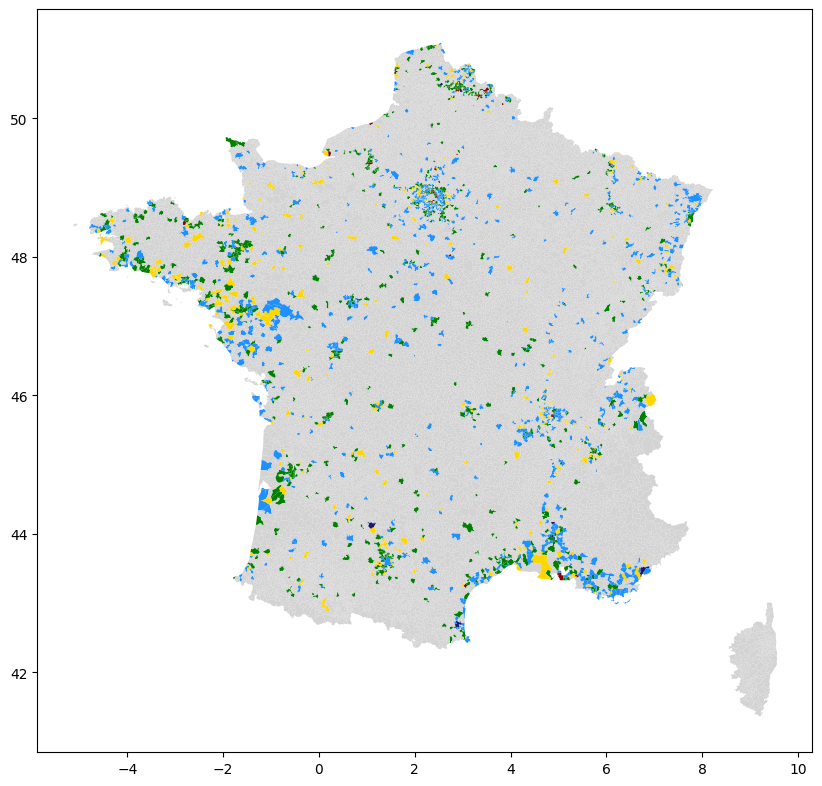

In [17]:
colors = {
    "Gauche Écolo": "green",
    "Extrême Gauche": "darkred",
    "Centre": "gold",
    "Droite": "dodgerblue",
    "Extrême Droite": "midnightblue",
    "Autre": "lightgray"
}             
                    
merged.plot(column="Bloc nuance",
            categorical=True,
            legend=True,
            color=merged['Bloc nuance'].map(colors),
            figsize=(10, 10)) 
            